In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Rizwan Hussain/Desktop/Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 & No Total Charges are recorded.

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0') 
df['TotalCharges']=df['TotalCharges'].astype('float') # convert Total Charges Dtype -> float

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum() # another sum() for overall sum

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum() # check for duplicates
df['customerID'].duplicated().sum() # check duplicates in customerID specifically

np.int64(0)

# converted 0 & 1 values in 'SeniorCitizen' to yes or no

In [10]:
def conv(value):
    if value==1:
        return 'yes'
    else:
        return 'no'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


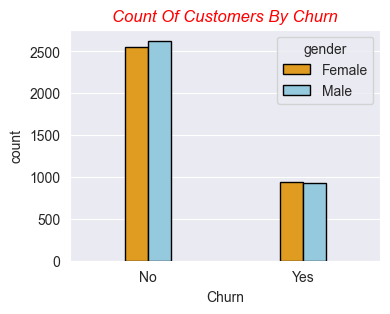

In [22]:
from matplotlib import style

plt.figure(figsize=(4,3))
sns.set_style('darkgrid')
sns.countplot(x='Churn', data=df, width=0.3, hue='gender', palette=['orange','skyblue'], edgecolor='black')
plt.title('Count Of Customers By Churn',color='red', style='oblique')
plt.show()

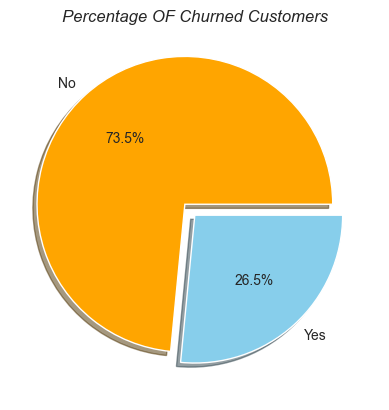

In [13]:
from turtle import color


gb=df.groupby('Churn').agg({'Churn':'count'})
gb
c=['orange','skyblue']
explodes=[0.1,0.0]

plt.pie(gb['Churn'], labels=gb.index, autopct='%0.1f%%',colors=c, shadow=True, explode=explodes)
plt.title('Percentage OF Churned Customers', style='italic')
plt.show()

''' From The Given Pie Chart we can conclude that 26.5 % of our customers have churned out.
    Now lets explore the reason
'''

# Churn By Gender

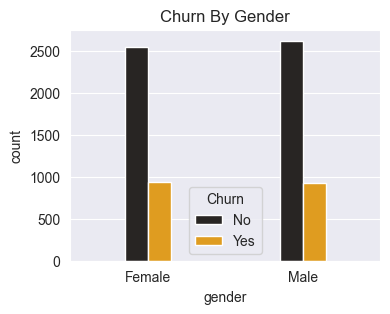

In [14]:
from turtle import title
from matplotlib.pyplot import figimage


plt.figure(figsize=(4,3))
sns.set_style('darkgrid')
sns.countplot(x='gender', data=df, hue='Churn', palette='dark:orange', width=0.3)
plt.title('Churn By Gender')
plt.show()

# Churn By Senior Citizen

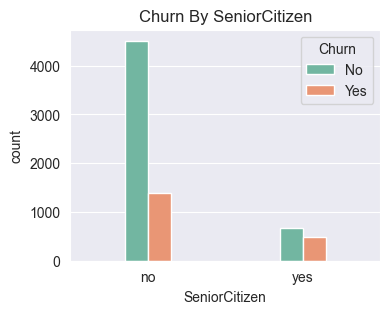

In [15]:
plt.figure(figsize=(4,3))
sns.set_style('darkgrid')
sns.countplot(x='SeniorCitizen', data=df, hue='Churn', palette='Set2', width=0.3)
plt.title('Churn By SeniorCitizen')
plt.show()

# Through Stacked BarChart

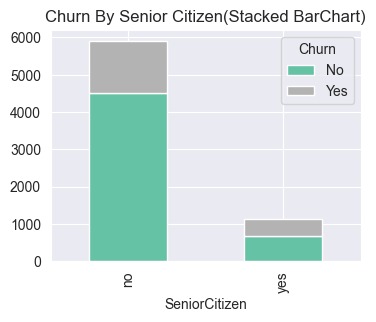

In [24]:
ct=pd.crosstab(df['SeniorCitizen'], df['Churn'])
ct.plot(kind='bar', stacked=True, figsize=(4,3), colormap='Set2')
plt.title('Churn By Senior Citizen(Stacked BarChart)')
plt.show()

# Comparitive a greater percentage of people in senior citizen category have churned.

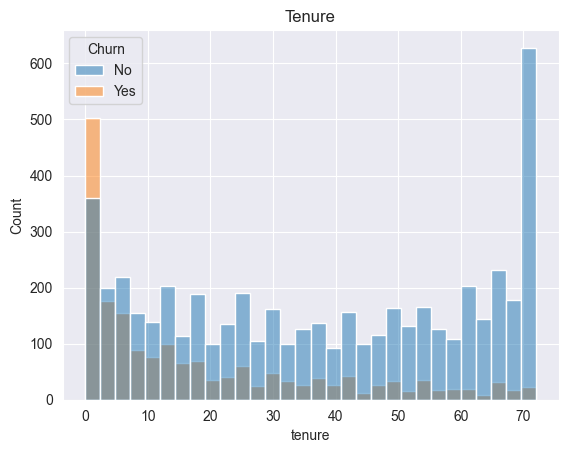

In [17]:
sns.histplot(x='tenure', data=df, color='orange', bins=30, hue='Churn')
plt.title('Tenure')
plt.show()

# people who have used our services for a long time have stayed and people who have used our services for one or two month..

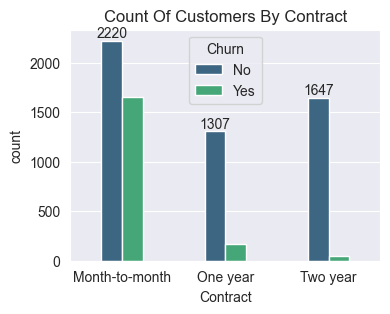

In [18]:
plt.figure(figsize=(4,3))
sns.set_style('darkgrid')
ax=sns.countplot(x='Contract', data=df, hue='Churn', palette='viridis', width=0.4)
ax.bar_label(ax.containers[0])
plt.title('Count Of Customers By Contract')
plt.show()

# People who have month to month contract are likely to churn then from those who have 1 or 2 years contract

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

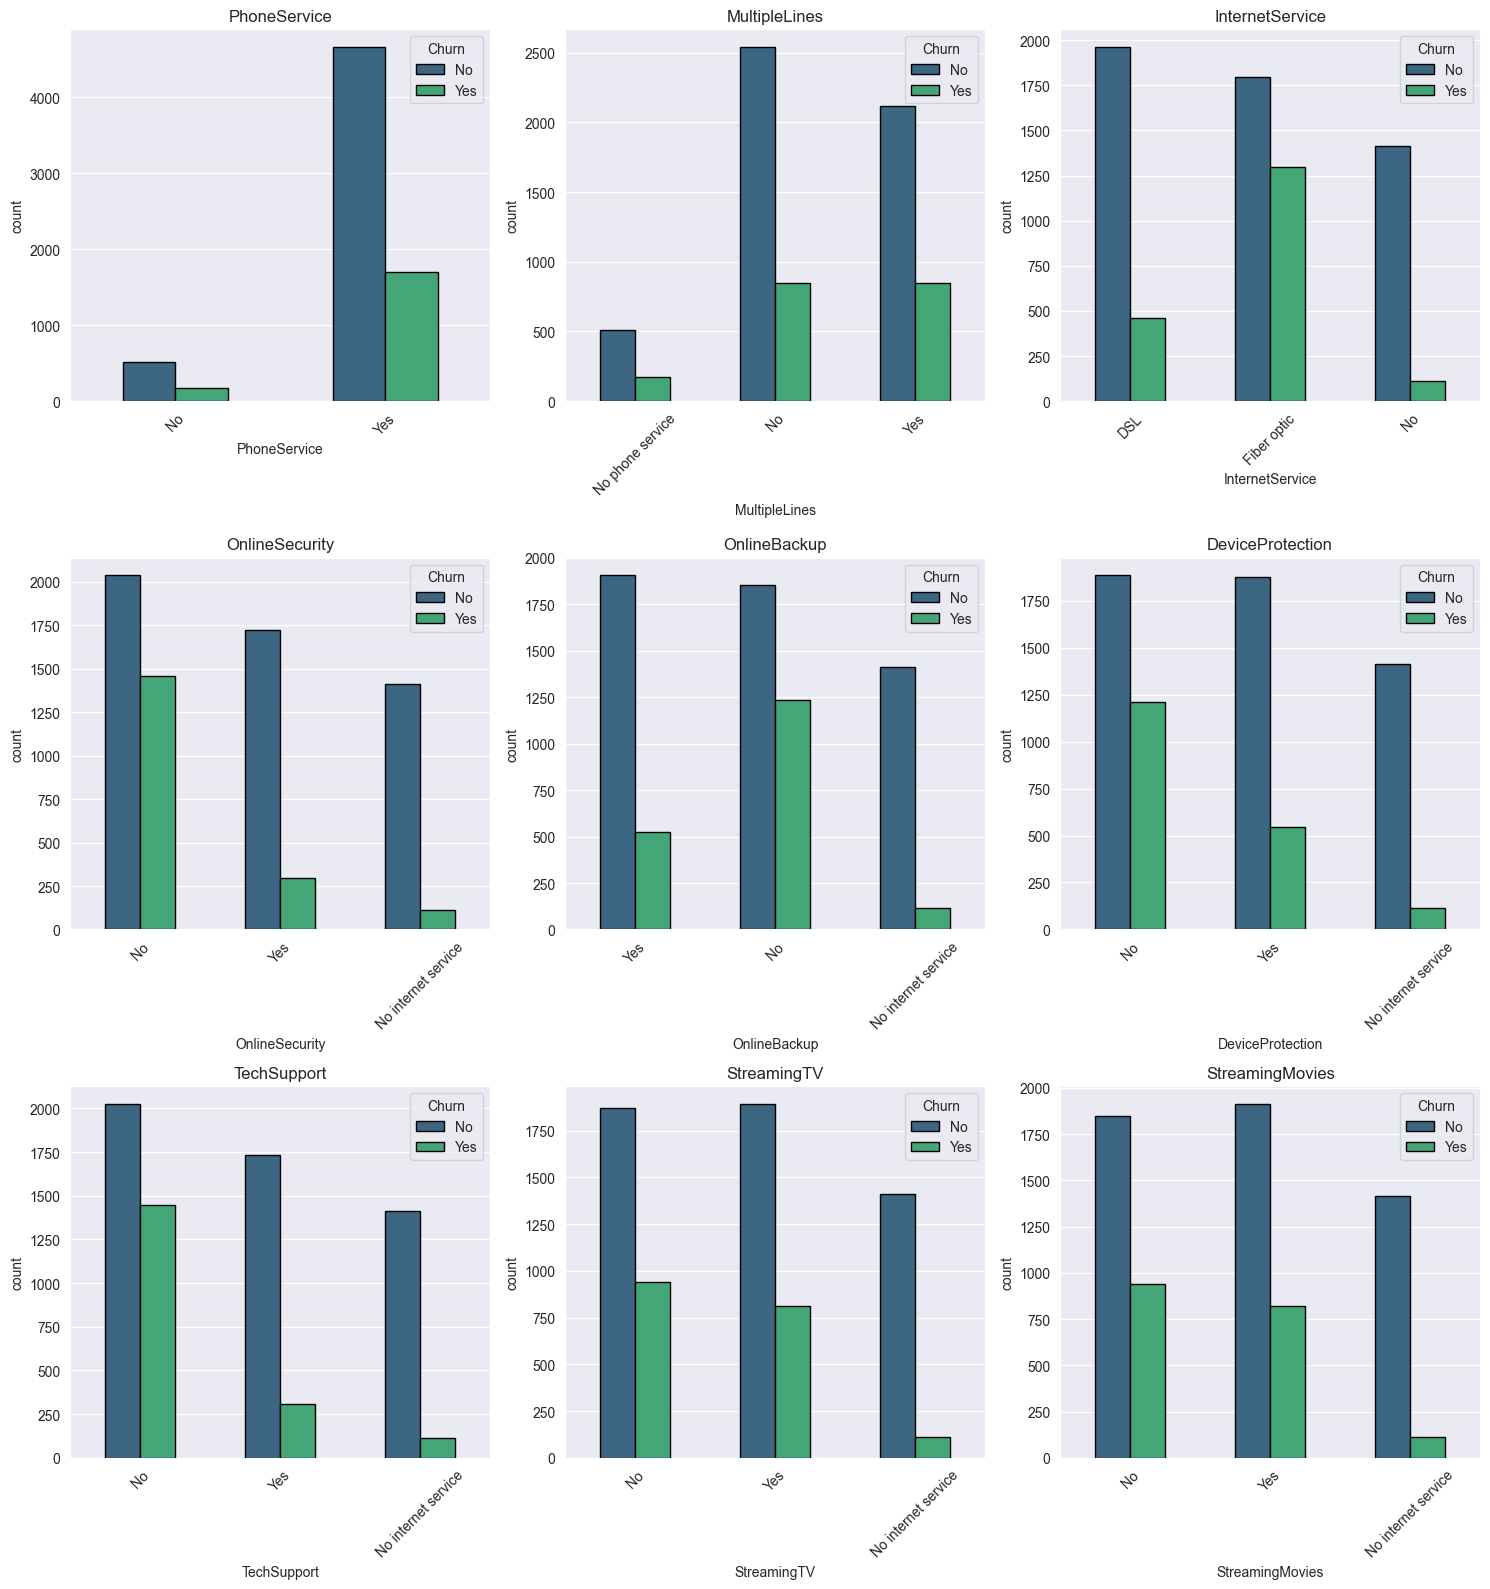

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(15, 16))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)        # 3 rows, 3 columns of subplots
    sns.countplot(data=df, x=col, palette='viridis', edgecolor='black', width=.5,hue=df['Churn'])
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# The majority of customers who do not churn tend to have services like PhoneService, InternetService, & Online Security enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used.

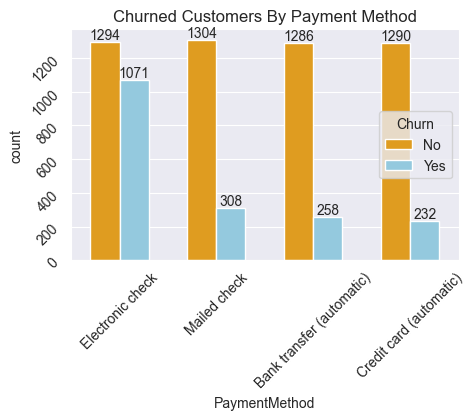

In [21]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')

ax=sns.countplot(x='PaymentMethod', data=df, hue='Churn', palette=['orange','skyblue'], width=0.6)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Churned Customers By Payment Method')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Customer is likely to churn when he is using electronic check as a payment method.